In [25]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Beschreibung des Datensatzes:

Das ArXiv ist ein Repository für wissenschaftliche Publikationen, die als Preprint veröffentlicht werden. Es wird von der Cornell University betrieben und ist seit 1991 online. Die meisten Artikel werden in den Bereichen Physik, Mathematik, Informatik, Quantitative Biologie, Quantitative Finanzen und Statistik veröffentlicht.

Der Datensatz enthält Metadaten zu allen 1,7 Millionen wissenschaftlichen Artikel, die zwischen 1991 und 2019 auf dem ArXiv veröffentlicht wurden. Die Metadaten enthalten die Titel der Artikel, die Autoren, die Kategorie, in die der Artikel fällt, das Abstrakt und die Veröffentlichungshistorie.



# Create random sample of n-percent of the data

Da der Datensatz sehr groß ist, haben wir uns entschieden, nur einen kleinen Teil des Datensatzes zu verwenden. Wir haben uns für 0,1% entschieden, da wir so noch genügend Daten haben, um die Daten zu analysieren und zu visualisieren, aber nicht zu viele, um die Rechenzeit zu reduzieren.

Zudem werden die Daten per Zufall ausgewählt. Desweiteren haben wir, als wir kleinere Datenmengen, eine Konvergenz der Ergebnisse festgestellt. Das heißt, dass die Ergebnisse sich nicht mehr großartig verändern, wenn wir mehr Daten verwenden.



In [27]:
arxiv_data = []
file_path = r'C:\Users\danie\Documents\Uni\Semester 13\Datascience 2\Projekte\Projekt1\arxiv-metadata-oai-snapshot.json'

sample_percentage = 0.001

with open(file_path, 'r') as file:
    for line in file:
        if random.uniform(0, 1) < sample_percentage:
            arxiv_data.append(json.loads(line))

df = pd.DataFrame(arxiv_data)

In [28]:
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0016,Li Tong,"Chao-Hsi Chang, Tong Li, Xue-Qian Li and Yu-Mi...",Lifetime of doubly charmed baryons,"17 pages, 3 figures and 1 table","Commun.Theor.Phys.49:993-1000,2008",10.1088/0253-6102/49/4/38,None,hep-ph,None,"In this work, we evaluate the lifetimes of t...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-18,"[[Chang, Chao-Hsi, ], [Li, Tong, ], [Li, Xue-Q..."
1,0704.0540,Jinhua Jiang,Jinhua Jiang and Xin Yan,On the Achievable Rate Regions for Interferenc...,"22 pages, 8 figures, submitted to IEEE Trans. ...",None,None,None,cs.IT math.IT,None,The interference channel with degraded messa...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...",2007-07-13,"[[Jiang, Jinhua, ], [Yan, Xin, ]]"
2,0704.0617,Anna Pietarila,"A. Pietarila, H. Socas-Navarro and T. Bogdan",Spectropolarimetric observations of the Ca II ...,"23 pages, 17 figures, accepted to ApJ some fig...",None,10.1086/518714,None,astro-ph,None,The Ca II infrared triplet is one of the few...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...",2009-11-13,"[[Pietarila, A., ], [Socas-Navarro, H., ], [Bo..."
3,0704.0679,Katsunori Iwasaki,Katsunori Iwasaki,Finite branch solutions to Painleve VI around ...,"45 pages, 22 figures, 5 tables",None,None,None,math.AG math.CA,None,Every finite branch solutions to the sixth P...,"[{'version': 'v1', 'created': 'Thu, 5 Apr 2007...",2007-05-23,"[[Iwasaki, Katsunori, ]]"
4,0704.1536,Jose P. Rodriguez,J. P. Rodriguez,Critical Current of Type-II Superconductors in...,"10 pages, 2 figures, published version, theory...","Phys. Rev. B 76, 224502 (2007)",10.1103/PhysRevB.76.224502,None,cond-mat.supr-con,None,The tilt modulus of a defective Abrikosov vo...,"[{'version': 'v1', 'created': 'Thu, 12 Apr 200...",2007-12-05,"[[Rodriguez, J. P., ]]"


Explaining the columns:
id: ArXiv ID (can be used to access the paper, see below) (dropped, not needed)
submitter: Who submitted the paper
authors: Authors of the paper
title: Title of the paper
comments: Additional info, such as number of pages and figures
journal-ref: Information about the journal the paper was published in
doi: [https://www.doi.org](Digital Object Identifier)    (dropped, not needed)
abstract: The abstract of the paper
categories: Categories / tags in the ArXiv system
versions: A version history

Source: Kaggle

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2225 non-null   object
 1   submitter       2212 non-null   object
 2   authors         2225 non-null   object
 3   title           2225 non-null   object
 4   comments        1695 non-null   object
 5   journal-ref     743 non-null    object
 6   doi             1082 non-null   object
 7   report-no       160 non-null    object
 8   categories      2225 non-null   object
 9   license         1790 non-null   object
 10  abstract        2225 non-null   object
 11  versions        2225 non-null   object
 12  update_date     2225 non-null   object
 13  authors_parsed  2225 non-null   object
dtypes: object(14)
memory usage: 243.5+ KB


In [30]:
df.describe()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
count,2225,2212,2225,2225,1695,743,1082,160,2225,1790,2225,2225,2225,2225
unique,2225,2192,2222,2225,1498,743,1082,160,814,9,2225,2224,1310,2221
top,0704.0016,Alan D. Martin,"Hisham Sati, Urs Schreiber",Lifetime of doubly charmed baryons,12 pages,"Commun.Theor.Phys.49:993-1000,2008",10.1088/0253-6102/49/4/38,CERN-PH-TH/2007-158,astro-ph,http://arxiv.org/licenses/nonexclusive-distrib...,"In this work, we evaluate the lifetimes of t...","[{'version': 'v1', 'created': 'Mon, 14 Sep 202...",2007-05-23,"[[Sati, Hisham, ], [Schreiber, Urs, ]]"
freq,1,2,2,1,9,1,1,1,80,1465,1,2,121,2


In [31]:
df.isnull().sum()

id                   0
submitter           13
authors              0
title                0
comments           530
journal-ref       1482
doi               1143
report-no         2065
categories           0
license            435
abstract             0
versions             0
update_date          0
authors_parsed       0
dtype: int64

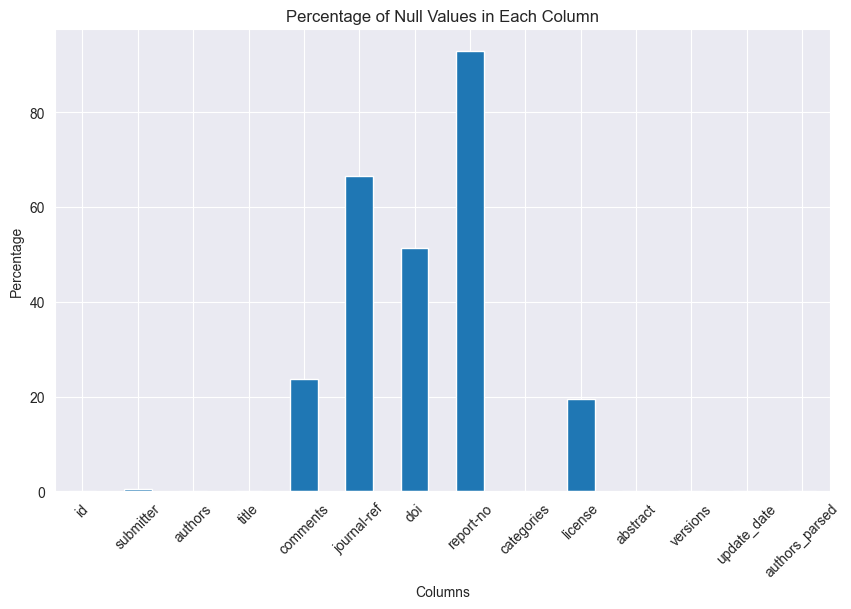

In [32]:
null_percentage = (df.isnull().sum() / len(df)) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
null_percentage.plot(kind='bar')
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

ID column has no missing values, but we will drop it anyway.
Because the column `journal-ref` has 50% missing values, we will drop it.
Because the column `doi` has 10% missing values, we will drop it.
Because the column `report-no` has 90% missing values, we will drop it.
Because the column `license` has 90% missing values, we will drop it.

In [33]:
df.drop(['id', 'journal-ref', 'doi', 'report-no', 'license'], axis=1, inplace=True)

# Exploring the data

Durch die ersten Einblicke, betrachten wir die Kategorien, die Autoren und die Submitter.

## For the next plot we use the "Pareto Principle" (80/20 rule)" and only plot the top 20% of the categories (by number of papers), because 20% of the categories make up 80% of the papers.

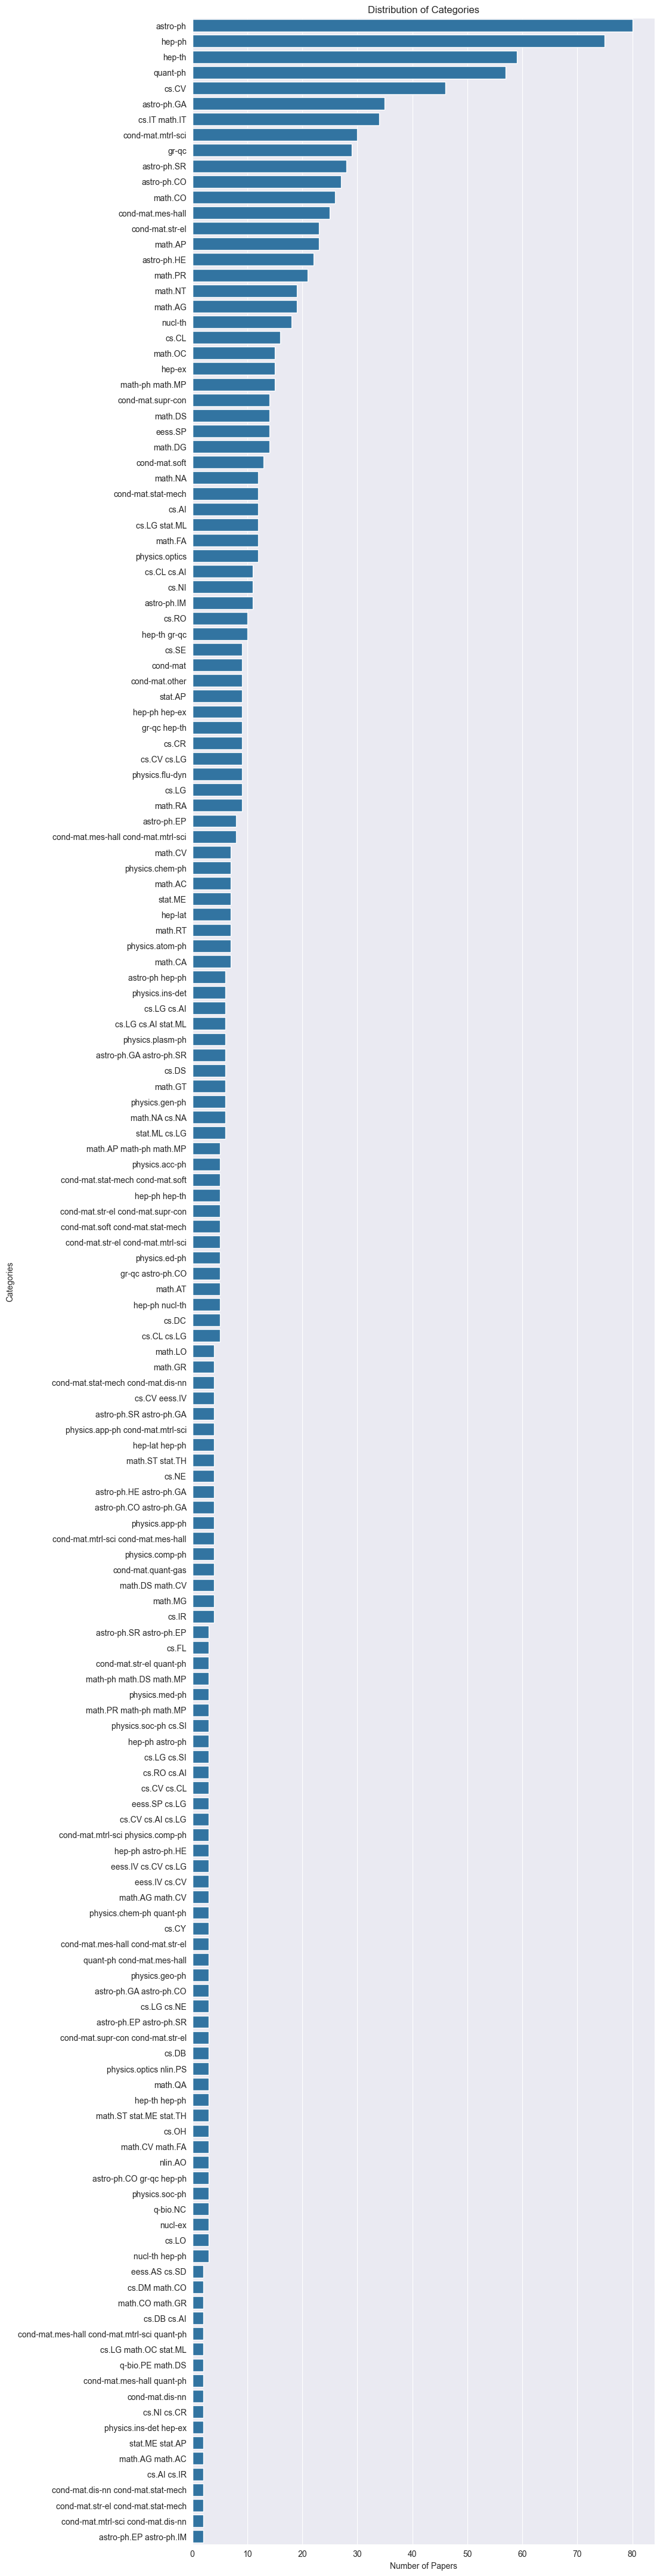

In [35]:
# Split multiple categories into separate rows
df_categories_split = df.assign(categories=df['categories'].str.split(',')).explode('categories')
df_only_categories = pd.DataFrame({'categories': df_categories_split['categories']})

# Count occurrences of each category
category_counts = df_only_categories['categories'].value_counts()

# Create a new DataFrame with counts and reset the index
df_category_counts = pd.DataFrame({'categories': category_counts.index, 'paper_count': category_counts.values})

# just 20% of df_category_counts
df_category_counts_percent = df_category_counts.head(int(len(df_category_counts) * 0.2))

# Plot the top 3 categories
plt.figure(figsize=(10, 55))
sns.barplot(x='paper_count', y='categories', data=df_category_counts_percent)
plt.title('Distribution of Categories')
plt.xlabel('Number of Papers')
plt.ylabel('Categories')
plt.show()

Da es viele Kategorien gibt, möchten wir nur die Top 10 Kategorien betrachten.


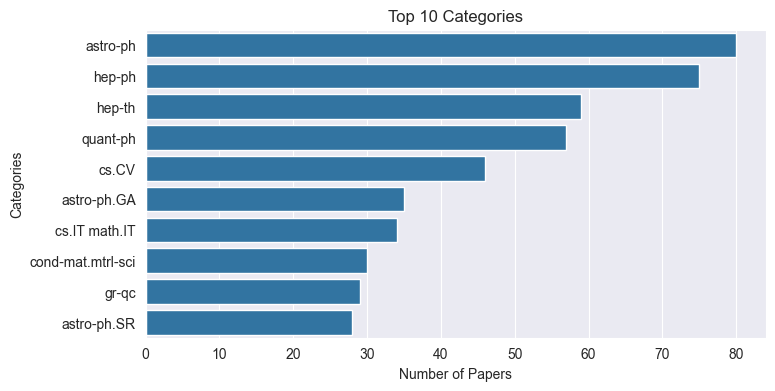

In [36]:
# plotting top 10 categories
plt.figure(figsize=(8, 4))
sns.countplot(y='categories', data=df, order=df['categories'].value_counts().iloc[:10].index)
plt.title('Top 10 Categories')
plt.xlabel('Number of Papers')
plt.ylabel('Categories')
plt.show()


Auch bei den Autoren, finden wir viele verschiedene Namen. Deshalb betrachten wir nur die Top 3 Autoren.

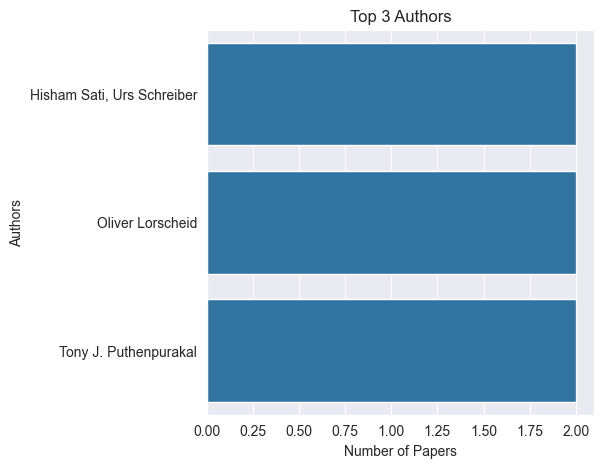

In [37]:
# plotting top 3 authors
plt.figure(figsize=(5, 5))
sns.countplot(y='authors', data=df, order=df['authors'].value_counts().iloc[:3].index)
plt.title('Top 3 Authors')
plt.xlabel('Number of Papers')
plt.ylabel('Authors')
plt.show()


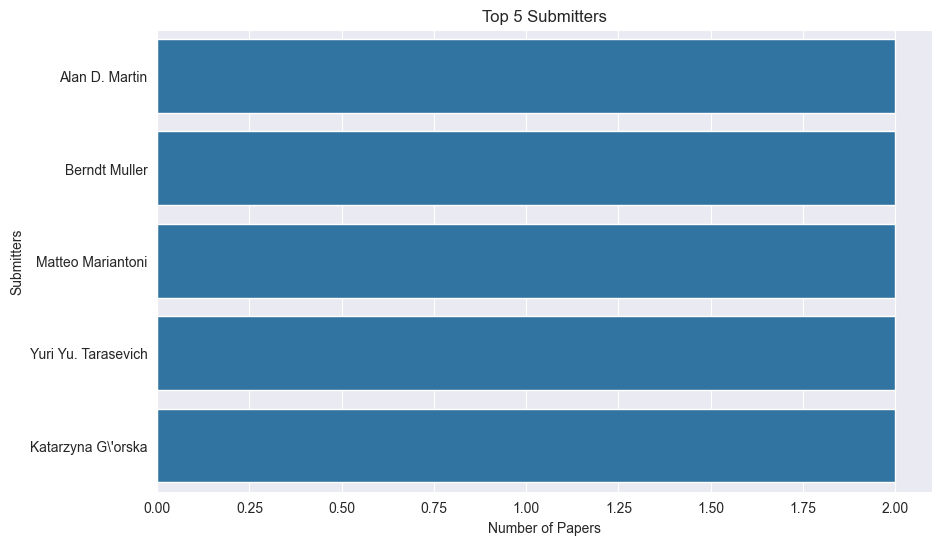

In [39]:
#plotting top 3 submitters
plt.figure(figsize=(10, 6))
sns.countplot(y='submitter', data=df, order=df['submitter'].value_counts().iloc[:5].index)
plt.title('Top 5 Submitters')
plt.xlabel('Number of Papers')
plt.ylabel('Submitters')
plt.show()
